In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "D:/MyWork/GeorgiaTech/ClassesWork/5_HomeWork-Matplotlib/mouse_drug_data.csv"
clinical_trial_data_to_load = "D:/MyWork/GeorgiaTech/ClassesWork/5_HomeWork-Matplotlib/clinicaltrial_data.csv"

df_mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
df_clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)


In [28]:
df_drug_n_clinical_data = pd.merge(left=df_mouse_drug_data,right=df_clinical_trial_data
                                   ,how="inner", left_on="Mouse ID", right_on="Mouse ID")

In [29]:
tumor_vol_mean = df_drug_n_clinical_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
#https://www.geeksforgeeks.org/python-pandas-series-iteritems/
list_mean_tumor_vol = []
for items in tumor_vol_mean.iteritems(): 
    drug, timepoint = items[0]
    list_mean_tumor_vol.append( {
            "Drug": drug
            , "Timepoint": timepoint
            , "Tumor Volume (mm3)": items[1]
        })

In [30]:
#https://stackoverflow.com/questions/46129774/pandas-standard-error-calculation-issue
#mean_tumor = merged_inner.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
#standard_errors = [sem(s) for s in merged_inner.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"]]
tumor_vol_err = (df_drug_n_clinical_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"]).sem()

list_err_tumor_vol = []
for items in tumor_vol_err.iteritems(): 
    drug, timepoint = items[0]
    list_err_tumor_vol.append( {
            "Drug": drug
            , "Timepoint": timepoint
            , "Tumor Volume (mm3)": items[1]
        })    

In [31]:
df_error_data = pd.DataFrame(list_err_tumor_vol)
df_main_data = pd.DataFrame(list_mean_tumor_vol)

In [32]:
df_main_data["Error"] = df_error_data["Tumor Volume (mm3)"].astype(float)
df_main_data.head(4)

,Drug,Timepoint,Tumor Volume (mm3),Error
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.448593
2,Capomulin,10,43.084291,0.702684
3,Capomulin,15,42.064317,0.838617


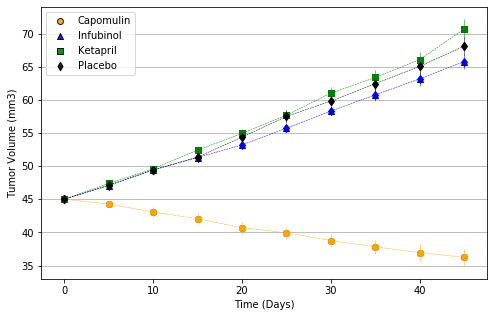

In [33]:
# https://matplotlib.org/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle

#following is a line chart.. but we do not have to use that
# plt.plot(first_scatter.loc[first_scatter["Drug"] == "Capomulin",["Timepoint"]]
#             , first_scatter.loc[first_scatter["Drug"] == "Capomulin",["Tumor Volume (mm3)"]],color='orange'
#          , marker='o', linestyle='dashed', linewidth=1, markersize=7, label="Capomulin")

# plt.plot(first_scatter.loc[first_scatter["Drug"] == "Infubinol",["Timepoint"]]
#             , first_scatter.loc[first_scatter["Drug"] == "Infubinol",["Tumor Volume (mm3)"]],color='blue'
#          , marker='^', linestyle='dashed', linewidth=1, markersize=7, label="Infubinol")

# plt.plot(first_scatter.loc[first_scatter["Drug"] == "Ketapril",["Timepoint"]]
#             , first_scatter.loc[first_scatter["Drug"] == "Ketapril",["Tumor Volume (mm3)"]],color='green'
#          , marker='s', linestyle='dashed', linewidth=1, markersize=7, label="Ketapril")

# plt.plot(first_scatter.loc[first_scatter["Drug"] == "Placebo",["Timepoint"]]
#             , first_scatter.loc[first_scatter["Drug"] == "Placebo",["Tumor Volume (mm3)"]],color='black'
#          , marker='d', linestyle='dashed', linewidth=1, markersize=7, label="Placebo")


plt.figure(figsize=(8,5))

plt.scatter(df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Timepoint"]]
            , df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Tumor Volume (mm3)"]]
            , marker="o", facecolors="orange", edgecolors="black", alpha=0.90, label="Capomulin")
plt.scatter(df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Timepoint"]]
            , df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Tumor Volume (mm3)"]]
            , marker="^", facecolors="blue", edgecolors="black", alpha=0.90, label="Infubinol")
plt.scatter(df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Timepoint"]]
            , df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Tumor Volume (mm3)"]]
            , marker="s", facecolors="green", edgecolors="black", alpha=0.90, label="Ketapril" )
plt.scatter(df_main_data.loc[df_main_data["Drug"] == "Placebo",["Timepoint"]]
            , df_main_data.loc[df_main_data["Drug"] == "Placebo",["Tumor Volume (mm3)"]]
            , marker="d", facecolors="black", edgecolors="black", alpha=0.90, label="Placebo")

plt.errorbar(x=df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Timepoint"]].values
            , y=df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Tumor Volume (mm3)"]].values
            , yerr=df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Error"]].values
            , color='orange', marker='o', linestyle='dashed', linewidth=0.5
            )
plt.errorbar(x=df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Timepoint"]].values
            , y=df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Tumor Volume (mm3)"]].values
            , yerr=df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Error"]].values
            , color='blue', marker='d', linestyle='dashed', linewidth=0.5
            )
plt.errorbar(x=df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Timepoint"]].values
            , y=df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Tumor Volume (mm3)"]].values
            , yerr=df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Error"]].values
            , color='green', marker='s', linestyle='dashed', linewidth=0.5
            )
plt.errorbar(x=df_main_data.loc[df_main_data["Drug"] == "Placebo",["Timepoint"]].values
            , y=df_main_data.loc[df_main_data["Drug"] == "Placebo",["Tumor Volume (mm3)"]].values
            , yerr=df_main_data.loc[df_main_data["Drug"] == "Placebo",["Error"]].values
            , color='black', marker='d', linestyle='dashed', linewidth=0.5
            )

plt.ylim(33, 74)

plt.grid(axis = "y")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="upper left")

In [35]:
metastatic_sites_mean = df_drug_n_clinical_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
list_mean_metastatic_sites = []
for items in metastatic_sites_mean.iteritems(): 
    drug, timepoint = items[0]
    list_mean_metastatic_sites.append( {
            "Drug": drug
            , "Timepoint": timepoint
            , "Metastatic Sites": items[1]
        })

In [47]:
metastatic_sites_error = (df_drug_n_clinical_data.groupby(["Drug","Timepoint"])["Metastatic Sites"]).sem()
list_error_metastatic_sites = []
for items in metastatic_sites_error.iteritems(): 
    drug, timepoint = items[0]
    list_error_metastatic_sites.append( {
            "Drug": drug
            , "Timepoint": timepoint
            , "Metastatic Sites": items[1]
        })

In [49]:
df_error_data = pd.DataFrame(list_error_metastatic_sites)
df_main_data = pd.DataFrame(list_mean_metastatic_sites)

In [50]:
df_main_data["Error"] = df_error_data["Metastatic Sites"].astype(float)
df_main_data.head(4)

,Drug,Metastatic Sites,Timepoint,Error
0,Capomulin,0.000,0,0.000000
1,Capomulin,0.160,5,0.074833
2,Capomulin,0.320,10,0.125433
3,Capomulin,0.375,15,0.132048


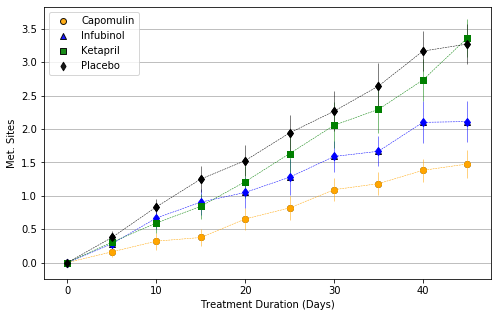

In [55]:

plt.figure(figsize=(8,5))

plt.scatter(df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Timepoint"]]
            , df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Metastatic Sites"]]
            , marker="o", facecolors="orange", edgecolors="black", alpha=0.90, label="Capomulin")
plt.scatter(df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Timepoint"]]
            , df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Metastatic Sites"]]
            , marker="^", facecolors="blue", edgecolors="black", alpha=0.90, label="Infubinol")
plt.scatter(df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Timepoint"]]
            , df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Metastatic Sites"]]
            , marker="s", facecolors="green", edgecolors="black", alpha=0.90, label="Ketapril" )
plt.scatter(df_main_data.loc[df_main_data["Drug"] == "Placebo",["Timepoint"]]
            , df_main_data.loc[df_main_data["Drug"] == "Placebo",["Metastatic Sites"]]
            , marker="d", facecolors="black", edgecolors="black", alpha=0.90, label="Placebo")

plt.errorbar(x=df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Timepoint"]].values
            , y=df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Metastatic Sites"]].values
            , yerr=df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Error"]].values
            , color='orange', marker='o', linestyle='dashed', linewidth=0.5
            )
plt.errorbar(x=df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Timepoint"]].values
            , y=df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Metastatic Sites"]].values
            , yerr=df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Error"]].values
            , color='blue', marker='d', linestyle='dashed', linewidth=0.5
            )
plt.errorbar(x=df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Timepoint"]].values
            , y=df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Metastatic Sites"]].values
            , yerr=df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Error"]].values
            , color='green', marker='s', linestyle='dashed', linewidth=0.5
            )
plt.errorbar(x=df_main_data.loc[df_main_data["Drug"] == "Placebo",["Timepoint"]].values
            , y=df_main_data.loc[df_main_data["Drug"] == "Placebo",["Metastatic Sites"]].values
            , yerr=df_main_data.loc[df_main_data["Drug"] == "Placebo",["Error"]].values
            , color='black', marker='d', linestyle='dashed', linewidth=0.5
            )

# plt.ylim(33, 74)

plt.grid(axis = "y")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.legend(loc="upper left")

In [69]:
mice_counts = df_drug_n_clinical_data.groupby(["Drug","Timepoint"])["Mouse ID"].count()

list_mice_counts = []
for items in mice_counts.iteritems(): 
    drug, timepoint = items[0]
    list_mice_counts.append( {
            "Drug": drug
            , "Timepoint": timepoint
            , "Mice Counts": items[1]
        })

df_filtered_data = pd.DataFrame(list_mice_counts).loc[pd.DataFrame(list_mice_counts)["Drug"].isin(["Capomulin", "Infubinol", "Ketapril", "Placebo"]),:]

df_initial_count = df_filtered_data.loc[ df_filtered_data["Timepoint"]==0 , :]
df_main_data = pd.merge(left=df_filtered_data,right=df_initial_count,how="inner", left_on="Drug", right_on="Drug")
df_main_data["Counts%"] = (df_main_data["Mice Counts_x"] / df_main_data["Mice Counts_y"]) * 100
df_main_data.head(5)

,Drug,Mice Counts_x,Timepoint_x,Mice Counts_y,Timepoint_y,Counts%
0,Capomulin,25,0,25,0,100.0
1,Capomulin,25,5,25,0,100.0
2,Capomulin,25,10,25,0,100.0
3,Capomulin,24,15,25,0,96.0
4,Capomulin,23,20,25,0,92.0


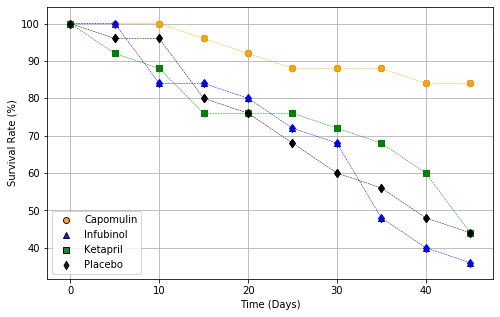

In [75]:

plt.figure(figsize=(8,5))

plt.scatter(df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Timepoint_x"]]
            , df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Counts%"]]
            , marker="o", facecolors="orange", edgecolors="black", alpha=0.90, label="Capomulin")
plt.scatter(df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Timepoint_x"]]
            , df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Counts%"]]
            , marker="^", facecolors="blue", edgecolors="black", alpha=0.90, label="Infubinol")
plt.scatter(df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Timepoint_x"]]
            , df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Counts%"]]
            , marker="s", facecolors="green", edgecolors="black", alpha=0.90, label="Ketapril" )
plt.scatter(df_main_data.loc[df_main_data["Drug"] == "Placebo",["Timepoint_x"]]
            , df_main_data.loc[df_main_data["Drug"] == "Placebo",["Counts%"]]
            , marker="d", facecolors="black", edgecolors="black", alpha=0.90, label="Placebo")

plt.errorbar(x=df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Timepoint_x"]].values
            , y=df_main_data.loc[df_main_data["Drug"] == "Capomulin",["Counts%"]].values
            , yerr=1
            , color='orange', marker='o', linestyle='dashed', linewidth=0.5
            )
plt.errorbar(x=df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Timepoint_x"]].values
            , y=df_main_data.loc[df_main_data["Drug"] == "Infubinol",["Counts%"]].values
            , yerr=1
            , color='blue', marker='d', linestyle='dashed', linewidth=0.5
            )
plt.errorbar(x=df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Timepoint_x"]].values
            , y=df_main_data.loc[df_main_data["Drug"] == "Ketapril",["Counts%"]].values
            , yerr=1
            , color='green', marker='s', linestyle='dashed', linewidth=0.5
            )
plt.errorbar(x=df_main_data.loc[df_main_data["Drug"] == "Placebo",["Timepoint_x"]].values
            , y=df_main_data.loc[df_main_data["Drug"] == "Placebo",["Counts%"]].values
            , yerr=1
            , color='black', marker='d', linestyle='dashed', linewidth=0.5
            )

# plt.ylim(33, 74)

plt.grid()
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc="lower left")

In [80]:
df_main_data = pd.DataFrame(list_mean_tumor_vol)

df_data_at_0_time = df_main_data.loc[df_main_data["Drug"].isin(["Capomulin", "Infubinol", "Ketapril", "Placebo"]) & df_main_data["Timepoint"].isin([0]),:]
df_data_at_45_time = df_main_data.loc[df_main_data["Drug"].isin(["Capomulin", "Infubinol", "Ketapril", "Placebo"]) & df_main_data["Timepoint"].isin([45]),:]

df_main_data = pd.merge(left=df_data_at_0_time,right=df_data_at_45_time,how="inner", left_on="Drug", right_on="Drug")

df_main_data["Change%"] = (df_main_data["Tumor Volume (mm3)_y"]-df_main_data["Tumor Volume (mm3)_x"])/df_main_data["Tumor Volume (mm3)_x"] * 100
df_main_data

,Drug,Timepoint_x,Tumor Volume (mm3)_x,Timepoint_y,Tumor Volume (mm3)_y,Change%
0,Capomulin,0,45.0,45,36.236114,-19.475303
1,Infubinol,0,45.0,45,65.755562,46.123472
2,Ketapril,0,45.0,45,70.662958,57.028795
3,Placebo,0,45.0,45,68.084082,51.297960


No handles with labels found to put in legend.


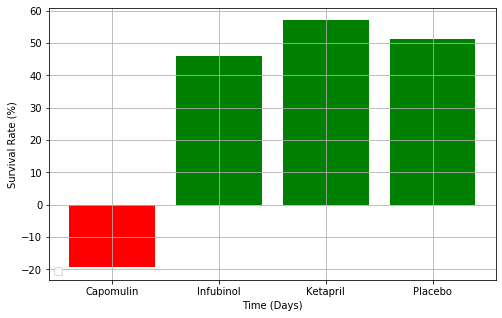

In [84]:
plt.figure(figsize=(8,5))

plt.bar(df_main_data["Drug"], df_main_data["Change%"], color=np.where(df_main_data["Change%"]>0, 'g', 'r'), align="center")

plt.grid()
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc="lower left")